# Chempy Exercises
1. Create a Substance Object
2. Writing Chemical Equations and Manipulating Units
3. Balancing Chemical Equations
4. Chemical Equilibria
5. Chemical Kinetics

Install with !pip install chempy
url: https://pypi.org/project/chempy/#toc-entry-6

In [29]:
#install: do this just once
#!pip install chempy

***

1. Create a Substance Object

1.1. Example

In [24]:
from chempy import Substance

ferricyanide = Substance.from_formula('Fe(CN)6-3')
ferricyanide.composition == {0: -3, 26: 1, 6: 6, 7: 6}  # 0 for charge
print(ferricyanide.unicode_name)

print(ferricyanide.latex_name + ", " + ferricyanide.html_name)
print('%.3f' % ferricyanide.mass)
211.955

Fe(CN)₆³⁻
Fe(CN)_{6}^{3-}, Fe(CN)<sub>6</sub><sup>3-</sup>
211.955


211.955

1.2. Test

In [30]:
methane = Substance.from_formula('CH4')
print("composition: %s" %methane.composition)
print("molar mass: %s" %(methane.mass))

composition: {6: 1, 1: 4}
molar mass: 16.043


### 2. Writing Chemical Equations and Manipulating Units

2.1. Example

In [31]:
from chempy import Reaction

r = Reaction.from_string("H2O -> H+ + OH-; 1e-4/s")
from chempy.units import to_unitless, default_units as u


print(r)
print(r.__dict__)
print(r.param * 10*u.s)

H2O -> H+ + OH-; 0.0001 1/s
{'reac': OrderedDict([('H2O', 1)]), 'inact_reac': OrderedDict(), 'prod': OrderedDict([('H+', 1), ('OH-', 1)]), 'inact_prod': OrderedDict(), 'param': array(0.0001) * 1/s, 'name': None, 'ref': None, 'data': {}}
0.001 dimensionless


2.2. Test

In [35]:
from chempy import Reaction

r = Reaction.from_string("2 H2 + O2 -> 2 H2O")
print(r)
print(r.__dict__)

2 H2 + O2 -> 2 H2O
{'reac': OrderedDict([('H2', 2), ('O2', 1)]), 'inact_reac': OrderedDict(), 'prod': OrderedDict([('H2O', 2)]), 'inact_prod': OrderedDict(), 'param': None, 'name': None, 'ref': None, 'data': {}}


- The object contains information on the numnber of molecules.

### 3. Balancing Chemical Equations

3.1. Example

In [19]:
# prompt: give an example on how to balance chemical reactions using chempy, e.g., balance "H2 + O2 -> H2O"

from chempy import balance_stoichiometry

reactants = ['H2', 'O2']
products = ['H2O']

balanced_reaction = balance_stoichiometry(reactants, products)

print(balanced_reaction)

(OrderedDict([('H2', 2), ('O2', 1)]), OrderedDict([('H2O', 2)]))


3.2. Test

In [37]:
from chempy import balance_stoichiometry
from chempy import Reaction

reaction_string = "H2 + O2 -> H2O"
# Instead of using reaction.balance(), use balance_stoichiometry
# to get the balanced coefficients for reactants and products.
reactants, products = balance_stoichiometry({'H2': 1, 'O2': 1}, {'H2O': 1})

# Format the output string
balanced_reaction_string = " + ".join([f"{coeff}{' '}{molecule}" for molecule, coeff in reactants.items()]) \
                          + " -> " \
                          + " + ".join([f"{coeff}{' '}{molecule}" for molecule, coeff in products.items()])

#print(balanced_reaction_string) #check

#change it into Reaction object
r = Reaction.from_string(balanced_reaction_string)
print(r)
print(r.__dict__)


2 H2 + O2 -> 2 H2O
{'reac': OrderedDict([('H2', 2), ('O2', 1)]), 'inact_reac': OrderedDict(), 'prod': OrderedDict([('H2O', 2)]), 'inact_prod': OrderedDict(), 'param': None, 'name': None, 'ref': None, 'data': {}}


- Converted the balanced equation into a reaction object.

### 4. Chemical Equilibria

4.1. Example

In [1]:
from collections import defaultdict
from chempy.equilibria import EqSystem

eqsys = EqSystem.from_string("""HCO3- = H+ + CO3-2; 10**-10.3
H2CO3 = H+ + HCO3-; 10**-6.3
H2O = H+ + OH-; 10**-14
""")  # pKa1(H2CO3) = 6.3 (implicitly incl. CO2(aq)), pKa2=10.3 & pKw=14
arr, info, sane = eqsys.root(defaultdict(float, {'H2O': 55.4, 'HCO3-': 1e-2}))
conc = dict(zip(eqsys.substances, arr))
from math import log10
print("pH: %.2f" % -log10(conc['H+']))
print("HCO3- concentration: %.2e" % conc['HCO3-'])

pH: 8.14
HCO3- concentration: 9.79e-03


4.2. Test - <b>Practice 18.1</b>
- Note to denote proton with H+ and not H3O+

In [9]:
from collections import defaultdict
from chempy.equilibria import EqSystem

# Define equilibrium equation and equilibrium constants, explicitly using H+ instead of H3O+
eqsys = EqSystem.from_string("""HC2H3O2 = H+ + C2H3O2-; 1.8*10**-5""")  # Ka(HC2H3O2) = 1.8*10**-5

# Define initial concentrations, ensuring all substances involved in the equilibrium are present
# Even if their initial concentration is 0, they need to be specified in the defaultdict
initial_conditions = defaultdict(float, {'HC2H3O2': 0.2, 'H+': 1e-7, 'C2H3O2-': 0.1}) # Example initial concentration of 0.1 M for HC2H3O2

# Solve for equilibrium concentrations
arr, info, sane = eqsys.root(initial_conditions)
conc = dict(zip(eqsys.substances, arr))

from math import log10
print("pH: %.2f" % -log10(conc['H+']))
print("H+ concentration: %.2e" % conc['H+']) # Corrected to print H+ concentration

pH: 4.44
H+ concentration: 3.60e-05


### 5. Chemical Kinetics

5.1. Example

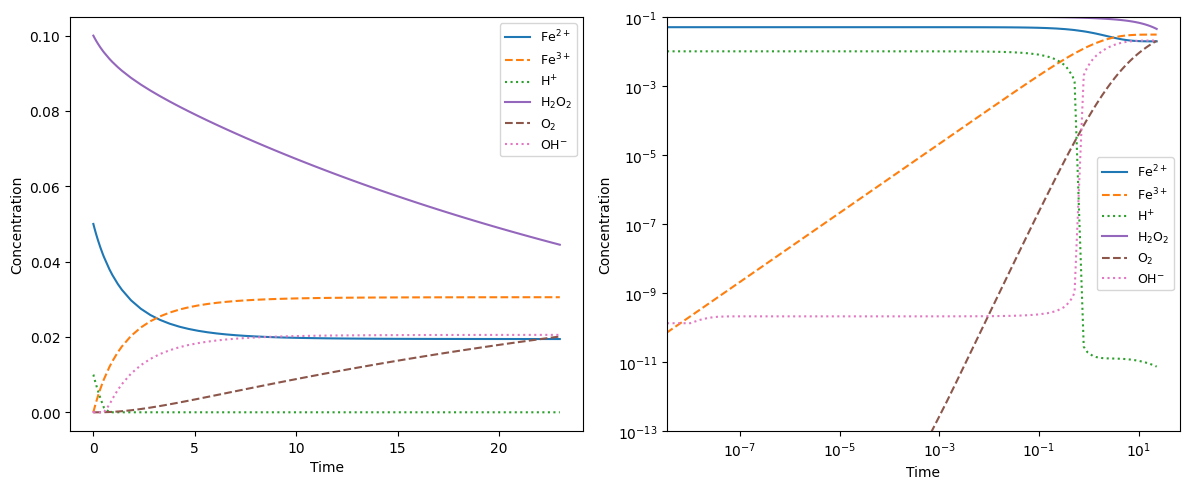

In [5]:
from chempy import ReactionSystem  # The rate constants below are arbitrary
rsys = ReactionSystem.from_string("""2 Fe+2 + H2O2 -> 2 Fe+3 + 2 OH-; 42
    2 Fe+3 + H2O2 -> 2 Fe+2 + O2 + 2 H+; 17
    H+ + OH- -> H2O; 1e10
    H2O -> H+ + OH-; 1e-4""")  # "[H2O]" = 1.0 (actually 55.4 at RT)
from chempy.kinetics.ode import get_odesys
odesys, extra = get_odesys(rsys)
from collections import defaultdict
import numpy as np
tout = sorted(np.concatenate((np.linspace(0, 23), np.logspace(-8, 1))))
c0 = defaultdict(float, {'Fe+2': 0.05, 'H2O2': 0.1, 'H2O': 1.0, 'H+': 1e-2, 'OH-': 1e-12})
result = odesys.integrate(tout, c0, atol=1e-12, rtol=1e-14)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax in axes:
    _ = result.plot(names=[k for k in rsys.substances if k != 'H2O'], ax=ax)
    _ = ax.legend(loc='best', prop={'size': 9})
    _ = ax.set_xlabel('Time')
    _ = ax.set_ylabel('Concentration')
_ = axes[1].set_ylim([1e-13, 1e-1])
_ = axes[1].set_xscale('log')
_ = axes[1].set_yscale('log')
_ = fig.tight_layout()